<a href="https://colab.research.google.com/github/isa-dgc/ML/blob/main/Validacao_Cruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

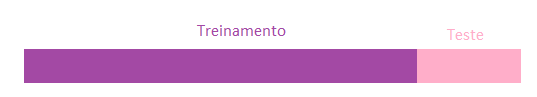

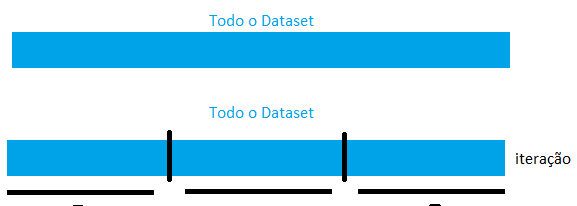

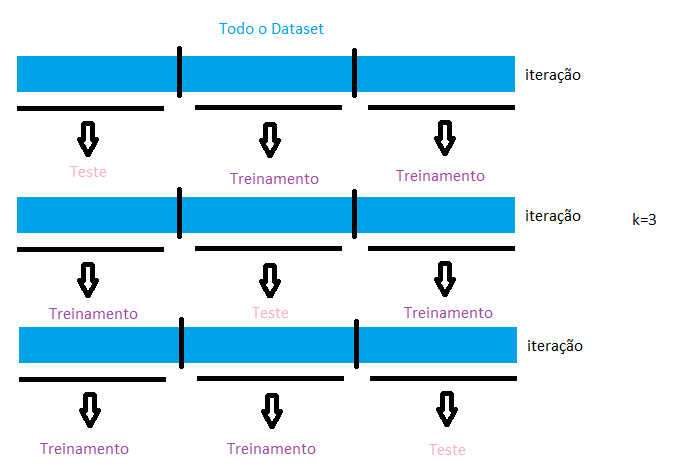

Validação Cruzada é uma técnica que pode ser utilizada para avaliar a performance de um modelo com menos variância que a técnica de dividir os dados em treino e teste.

Os dados são separados em partes (k-folds) e cada fold é utilizado no treinamento de forma repetida, no final, a performance resumida é feita usando a média e o desvio padrão em cada fold.

Logo, a confiabilidade do resultado é maior, assim como aumenta a acurácia do modelo.

O detalhe dessa técnica é em definir o valor correto de k, para ser adequado para o número de repetições necesárias.

# Normal

In [ ]:
#https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
arquivo = 'diabetes.csv'
colunas = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
dados = read_csv(arquivo, names = colunas)
array = dados.values
array

array([['Pregnancies', 'Glucose', 'BloodPressure', ...,
        'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       ['6', '148', '72', ..., '0.627', '50', '1'],
       ['1', '85', '66', ..., '0.351', '31', '0'],
       ...,
       ['5', '121', '72', ..., '0.245', '30', '0'],
       ['1', '126', '60', ..., '0.349', '47', '1'],
       ['1', '93', '70', ..., '0.315', '23', '0']], dtype=object)

In [ ]:
X = array[1:,0:8]
Y = array[1:,8]

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y,test_size=0.3,random_state = 45)

In [ ]:
modelo = LogisticRegression()
modelo.fit(X_treino,Y_treino)
result = modelo.score(X_teste,Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 72.727%


# Validaçao

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
arquivo = 'diabetes.csv'
colunas = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
dados = read_csv(arquivo, names = colunas)
array = dados.values
array

array([['Pregnancies', 'Glucose', 'BloodPressure', ...,
        'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       ['6', '148', '72', ..., '0.627', '50', '1'],
       ['1', '85', '66', ..., '0.351', '31', '0'],
       ...,
       ['5', '121', '72', ..., '0.245', '30', '0'],
       ['1', '126', '60', ..., '0.349', '47', '1'],
       ['1', '93', '70', ..., '0.315', '23', '0']], dtype=object)

In [ ]:
X = array[1:,0:8]
Y = array[1:,8]

In [ ]:
num_folds = 100

kfold = KFold(num_folds, shuffle = True, random_state = 45)

modelo_1 = LogisticRegression()
resultado = cross_val_score(modelo_1,X,Y, cv=kfold)

print("Acurácia Final: %.3f%%" % (resultado.mean() * 100.0))

Acurácia Final: 77.875%
